# Tilt and bottom pressure at Axial Seamount


We are interested in sensor data that anticipates the next eruption of an undersea volcano. 
This eruption is currently expected in the 2022--2025 time range but that prediction will change.
The primary sensors for this investigation measure **bottom pressure** and **tilt**. 
For the expert scientist's view please see
[Bill Chadwick's Axial eruption forecast blog](https://www.pmel.noaa.gov/eoi/axial_blog.html).
It is updated regularly.


This notebook explains and reproduces the interpretation of bottom pressure and tilt
data. The related notebooks provide further support including notes on how to get
this data and how to work with it. 

Our grand agenda is to de-mystify data science as a human activity and a process. 
We are breaking down the steps in drawing meaning from data.


## the volcano


To begin our 'journey to meaning' narrative let's start by sketching out the situation at 
the volcano. 


This volcano, called [Axial Seamount](https://en.wikipedia.org/wiki/Axial_Seamount), is located 
on the sea floor about 500 km west of the Oregon coast. Sensors are placed in four locations inside
the Axial caldera, the crater in the center of the volcano formed by eruptions. The floor of 
the caldera is about 2200 meters beneath the surface of the Pacific Ocean. It is roughly
rectangular, about 5 kilometers by 12 kilometers across. 


Axial Seamount has erupted in 1998, 20011, and 2015. 
Eruptions follow a period of pressure build-up under the sea floor 
as magma rises up from the earth's interior.
*Melt migration* is the inflationary process that precedes eruptions.
The increasing pressure gradually inflates the sea floor: It rises and also tilts 
like the upper surface of a large, inflating bubble. 


The surface rise is on the scale of a couple of meters and the tilt is measured in 
less than a thousandth of a degree. The sensors are therefore very sensitive. 


## bottom pressure


As we go deeper below the surface of the ocean the water pressure increases; 
one additional atmosphere of pressure for every ten meters of depth. At the
depth of the Axial caldera floor we see a pressure of about 200 atmospheres.
'Bottom pressure' is the continuous measurement of this pressure at
the bottom of the ocean, on the sea floor. At each of the four sites in the
Axial caldera are placed accurate pressure sensors. 


Suppose we look at the measured bottom pressure at one of the four measurement 
sites for a day. 


Suppose we look at the bottom pressure for a month. 


Suppose we look at the bottom pressure for three years after we average out
all the effect of tides. 




## tilt


There are three tilt meters at each of the four caldera sensor sites. The
first measures tilt very coarsely on a scale of one degree. It is expected
to produce a very flat signal because the cumulative tilt will be down 
in the range of hundredths to thousandths of a degree. 


The second tilt meter is more sensitive ('low resolution'). 


The third tilt meter is high resolution, measuring tilts in the range of 
one millionth of a radian. One millionth of a radian is equivalent to 
57 millionths of a degree. If you have a flat bar one kilometer 
in length and lift one end of it by one centimeter: That makes an 
angle of 10 millionths of a radian. 



## technical website links

Here are the PMEL 'live' links for the four botpt instrument sites tied to a [central index page](https://www.pmel.noaa.gov/eoi/rsn/index.html):


* [Axial central caldera](https://www.pmel.noaa.gov/eoi/rsn/mj03f.html)
* [Axial eastern caldera](https://www.pmel.noaa.gov/eoi/rsn/mj03e.html)
* [International District](https://www.pmel.noaa.gov/eoi/rsn/mj03d.html)
* [ASHES vent field](https://www.pmel.noaa.gov/eoi/rsn/mj03b.html)


* interactive oceans map
* interactive oceans main
* interactive oceans data


* [OOI **bottom pressure** and **tilt** home page](https://oceanobservatories.org/instrument-class/botpt/): Organizing page
    * Photo credit for sensor on seafloor at Int'l District: NSF-OOI/UW/CSSF; Dive R1723; V14.
    * [bottom pressure: data product specification](https://oceanobservatories.org/wp-content/uploads/2015/10/1341-00070_Data_Product_SPEC_BOTPRES_OOI.pdf)
        * 1 decibar = 10 kPa; and sensor drift expected to be < 10cm per year, to be compensated by the science team
        * 1 atmosphere is about 1 bar
    * Stub? [Sea floor uplift and deflation **BOTSFLU**](https://oceanobservatories.org/data-product/botsflu/)
        * Maybe this is a derived product but the DPS is 'not available'
    * [tilt: data product specification](https://oceanobservatories.org/wp-content/uploads/2015/10/1341-00060_Data_Product_Spec_BOTTILT_OOI.pdf)


## Data quality overview


## Bottom pressure


### Summary


There are two major data quality issues and lots of bloat in the NetCDF file. The data itself looks good on a tidal time scale and on a wave time scale the noise is comparable to signal.


### Detail


- The data are simple: Just timestamps and pressures: At 20 samples per second
- In what follows we consider an 8-day duration data file. 
    - This particular file starts out at one sample per second and then soon switches gears to 20 samples/sec: **Data quality issue 1**
- Zoomed out the pressure follows a tidal signal with amplitude of a couple of meters
    - The tidal signal is frequently interrupted by brief (a few samples long) spikes 
    - These go to lower pressure, less by a meter or two. 
    - This looks to me like a capacitor discharge dropping a voltage spike into an ADC
    - It is clearly random and not a real signal. 
    - We see about five per hour on average. **Data quality issue 2**
- Zooming in to very fine time resolution the signal has vertical structure (comparable to wave motion) and noise. 
    - These are of comparable vertical scale, about 4 cm. 


There are 15 different Data Variables of which only two -- time and pressure -- are sensor data. 
I calculate each observation (again at 20 per second) requires 125 bytes where time and pressure require only 12 bytes. 
If I did that right 125 bytes x 8 days x 20 samples / second is 1.7GB but the NetCDF file is only 0.5GB for 12 million observations; so either the file is compressed or I'm just wrong on some count.

In [1]:
# mini-source control
# copied 29-SEP-202: to tilt* and chlorophyll*

pangeo_jupyter = False

import os
import sys
import time
import glob           # list files in a directory

home_dir = os.getenv("HOME")
this_dir = home_dir + '/chlorophyll/'

if pangeo_jupyter: data_dir = home_dir + '/data/'
else: data_dir = '/data/'

print('\nJupyter Notebook running Python {}'.format(sys.version_info[0]))
print('the data directory is', data_dir, '\n')

# Some notes on writing movies (ongoing project)
#     This may be necessary on Pangeo: conda install -c conda-forge ffmpeg -y -q       
#       ... noting that -y skips dialogs; -q reduces stdout clutter
#     Note: On Pangeo `which ffmpeg` returns `/srv/conda/envs/notebook/bin/ffmpeg`
#       ... plt.rcParams['animation.ffmpeg_path'] = '/srv/conda/envs/notebook/bin/ffmpeg' 
#       ... (matplotlib must see the movie writer 'ffmpeg')

from matplotlib import pyplot as plt
from matplotlib import colors as mplcolors   # map data values to colors

import warnings
# turn off warnings using: warnings.filterwarnings("ignore")

import numpy as np
from numpy import datetime64 as dt64, timedelta64 as td64
import pandas as pd
import xarray as xr

# doy = day of year, indexed from 1 (1-JAN)
# Day of year calculated directly from a datetime64
def doy(theDatetime): return 1 + int((theDatetime - dt64(str(theDatetime)[0:4] + '-01-01')) / td64(1, 'D'))
def dt64_from_doy(year, doy): return dt64(str(year) + '-01-01') + td64(doy-1, 'D')


Jupyter Notebook running Python 3
the data directory is /data/ 



# ASHES pressure

In [7]:
# Already done (with 161 files)
#   Never do this again at full sampling rate en masse; the 15s resampled data are more manageable.
# 
# pressurefiles = glob.glob('/data/botpt/deployment*.nc')
# print('there are ' + str(len(pressurefiles)) + ' data files available for pressure on the sea floor')
# ds=xr.open_dataset(pressurefiles[43])
# ds

In [8]:
# tidal signal: Would need to go grab a 20sps data file to get this working

# tmp=[]
# tmptime=[]
# nplots = 2                     # this can be 40 if you like

# startindex = 3000000
# datablock = 500000             # for 20 samples / sec use 72000 to get one hour
#                                # for 1 sample / sec use a small startindex and datablock of say 200k 

# for i in range(nplots):
#     tmp.append(ds.isel(obs=slice(startindex + i*datablock, startindex + i*datablock + datablock)).bottom_pressure)
#     tmptime.append(ds.isel(obs=slice(startindex + i*datablock, startindex + i*datablock + datablock)).time)

# fig, axs = plt.subplots(nplots, 1, figsize=(8, 6*nplots), tight_layout=True)

# for i in range(nplots):
#     axs[i].plot(tmptime[i], tmp[i], color='k')
#     axs[i].set(ylim = (2272, 2280))


In [9]:
# move to background: This compares scatter to rolling mean
# tmpsub, tmpsubtime, tmproll = [], [], []

# nobs=50
# nplots = 2
# datablock = 1000             
# slice_start = 100
# for i in range(nplots):
#     tmpsub.append(tmp[0].isel(obs=slice(slice_start + i*datablock, slice_start + i*datablock + datablock)))
#     tmpsubtime.append(tmptime[0].isel(obs=slice(slice_start + i*datablock, slice_start + i*datablock + datablock)))
#     tmproll.append(tmp[0].isel(obs=slice(slice_start + i*datablock, slice_start + i*datablock + datablock)).rolling(obs=nobs, center=True).mean())

# fig, axs = plt.subplots(nplots, 1, figsize=(36, 12*nplots), tight_layout=True)

# for i in range(nplots):
#     axs[i].plot(tmpsubtime[i], tmproll[i], color='r')
#     axs[i].scatter(tmpsubtime[i], tmpsub[i], color='k', marker='.')
#     # axs[i].set(ylim = (2275.95, 2276.05))

# Notice 1-second intervals; this switches over to the expected 20 samples per second
# ds.time[0:10] 

# Smoking gun plot: Sometimes the data are one sample per second, sometimes 20 samples per second
# ds.time.plot()

# fig, axs = plt.subplots(2, 1, figsize=(36, 24), tight_layout=True)

# tmp1 = tmp[0].isel(obs=slice(3200,3400))
# tmp2 = tmp[0].isel(obs=slice(4200,4400))

# axs[0].scatter(tmp1.obs, tmp1, marker='.', color='r')
# axs[1].scatter(tmp2.obs, tmp2, marker='.', color='k')

# Suspect now that we see this is one sample per second

## Average

Let's get a single depth for the entire dataset. Then go get a couple more near this time; and then go to later in the record by a couple years and see if there is a consistent change.

In [10]:
# I will merge some test cells here...

# ds=xr.open_dataset(pressurefiles[0]).swap_dims({'obs':'time'})
# da_day = ds.bottom_pressure.resample(time='1D').mean()
# da_day

# ds.time[0], ds.time[-1]

# da_day.mean()

# xr.open_dataset(data_dir + 'botpt/botpt.nc').swap_dims({'obs':'time'}).bottom_pressure.resample(time='1D').mean().mean()

# xr.open_dataset(datafiles[0]).swap_dims({'obs':'time'}).bottom_pressure.mean()

# xr.open_dataset(datafiles[0]).bottom_pressure.mean()

In [11]:
# DataArray lists (runs in about four minutes)
# mean_pressure_per_file = [xr.open_dataset(src).bottom_pressure.mean() for src in pressurefiles]
# startdate_per_file = [xr.open_dataset(src).time[0] for src in pressurefiles]
# pressure = [float(mean_pressure_per_file[i]) for i in range(len(mean_pressure_per_file))]
# ptimes = [dt64(startdate_per_file[i].values) for i in range(len(startdate_per_file))]
# pd_dframe = pd.DataFrame(list(zip(ptimes, pressure)), columns=['datetime', 'pressure'])
# pd_dframe.to_csv('pressure_data.csv')

# 304 ASHES pressure

In [12]:
pd_dframe = pd.read_csv('pressure_data.csv')
pressure = pd_dframe['pressure'].to_list()
ptimes = [dt64(pd_dframe['datetime'][i]) for i in range(len(pd_dframe.index))]

[(2276.4, 2275.4), Text(0, 0.5, 'pressure (dbar)'), Text(0.5, 0, 'date')]

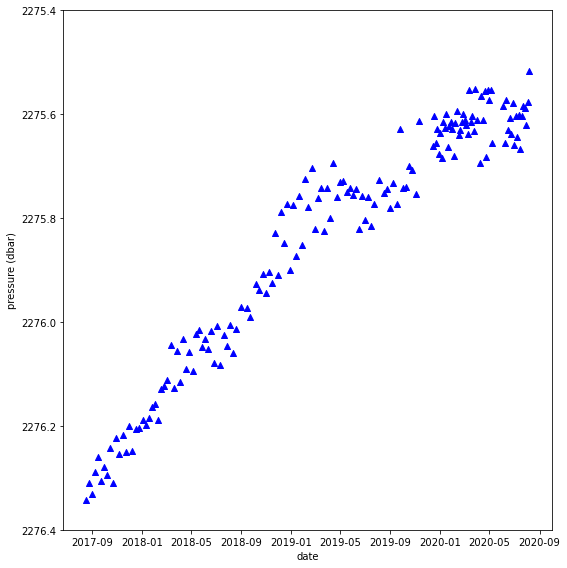

In [14]:
fig, axs = plt.subplots(1, 1, figsize=(8, 8), tight_layout=True)
axs.scatter(ptimes, pressure, marker='^', color='b')
axs.set(ylim = (2276.4, 2275.4), xlabel='date', ylabel='pressure (dbar)')

# 304 tilt (lily)

In [15]:
# %%time

# tiltfiles = glob.glob('/data/botpt/lily/deployment*.nc')
# print('there are ' + str(len(tiltfiles)) + ' data files available for tilt')
# ds = [xr.open_dataset(tiltfile).swap_dims({'obs':'time'}) for tiltfile in tiltfiles]

# this also took a couple minutes
# ds_concat=xr.concat(ds, 'time')

# > GB output file; do not do this unnecessarily
# ds_concat.to_netcdf('/data/botpt/lily/full_time_series.nc')

# ds_days = ds_concat.resample(time="1D").mean()

# ds_days.seafloor_tilt_magnitude.plot()

# ds_days.seafloor_tilt_direction.plot()

# ds_days.lily_x_tilt.plot()

# ds_days.lily_y_tilt.plot()

# ds_days.to_netcdf('/data/botpt/lily/301_full_daily_series.nc')

# ds_concat.obs.plot() shows a few jukes here and there

# 301 tilt (lily)

In [16]:
# tiltfiles = glob.glob('/data/botpt/lily/deployment*.nc')
# print('there are ' + str(len(tiltfiles)) + ' data files available for tilt')
# ds = [xr.open_dataset(tiltfile).swap_dims({'obs':'time'}) for tiltfile in tiltfiles]
# ds_day = [this_ds.resample(time="1D").mean() for this_ds in ds]
# ds_concat = xr.concat(ds_day, 'time')
# ds_concat.to_netcdf('/data/botpt/lily/301_full_daily_series.nc')
# ds_concat.seafloor_tilt_magnitude.plot()
# ds_concat.seafloor_tilt_direction.plot()

# 302 tilt (lily)

In [17]:
# tiltfiles = glob.glob('/data/botpt/lily/deployment*.nc')
# print('there are ' + str(len(tiltfiles)) + ' data files available for tilt')
# for i in range(len(tiltfiles)):
#     print('file', i)
#     ds = xr.open_dataset(tiltfiles[i]).swap_dims({'obs':'time'}).resample(time="1D").mean()
#     padstring = '0' if i < 10 else ''
#     outfilename = '/data1/botpt/lily/tmp' + padstring + str(i) + '.nc'
#     ds.to_netcdf(outfilename)
#     print('    ...done')

# tmpfiles = glob.glob('/data/botpt/lily/tmp*.nc')
# tmpfiles
# ds = [xr.open_dataset(tmpfile) for tmpfile in tmpfiles]
# ds_concat = xr.concat(ds, 'time')
# ds_concat.to_netcdf('/data/botpt/lily/302_full_daily_series.nc')

# ds_concat.seafloor_tilt_magnitude.plot()

# ds_concat.seafloor_tilt_direction.plot()

# 303 tilt (lily)

In [47]:
# tiltfiles = glob.glob('/data/botpt/lily/deployment*.nc')
# print('there are ' + str(len(tiltfiles)) + ' data files available for tilt')
# for i in range(len(tiltfiles)):
#     print('file', i)
#     ds = xr.open_dataset(tiltfiles[i]).swap_dims({'obs':'time'}).resample(time="1D").mean()
#     padstring = '0' if i < 10 else ''
#     outfilename = '/data1/botpt/lily/tmp' + padstring + str(i) + '.nc'
#     ds.to_netcdf(outfilename)


# tmpfiles = glob.glob('/data/botpt/lily/tmp*.nc')
# ds = [xr.open_dataset(tmpfile) for tmpfile in tmpfiles]
# ds_concat = xr.concat(ds, 'time')
# ds_concat.to_netcdf('/data/botpt/lily/303_full_daily_series.nc')

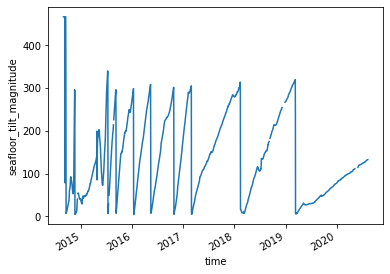

In [48]:
ds = xr.load_dataset('/data/botpt/lily/303_full_daily_series.nc')
ds.seafloor_tilt_magnitude.plot()

# heat

Per Bill Chadwick's site: The coarse tilt meter 'heat' running at 1-degree sensitivity is expected to be a flat signal.

In [48]:
# deployment0003_RS03ASHS-MJ03B-09-BOTPTA304-streamed-botpt_heat_sample_20170815T001037-20181107T235958.nc
# deployment0003_RS03ASHS-MJ03B-09-BOTPTA304-streamed-botpt_heat_sample_20181108T000001-20200119T235958.nc
# deployment0003_RS03ASHS-MJ03B-09-BOTPTA304-streamed-botpt_heat_sample_20200120T000001-20200810T224044.nc

# heatfiles = glob.glob('/data/botpt/heat/deployment*.nc')
# print('there are ' + str(len(heatfiles)) + ' data files available for heat')

# ds = [xr.open_dataset(heatfile).swap_dims({'obs':'time'}) for heatfile in heatfiles]
# ds_concat=xr.concat(ds, 'time')
# ds_concat

In [49]:
# ds_days = ds_concat.resample(time="1D").mean()
# ds_days.to_netcdf('/data/botpt/heat/heat_full_record_1day.nc')
# ds_days = xr.open_dataset('/data/botpt/heat/heat_full_record_1day.nc')
# fig, axs = plt.subplots(1, 1, figsize=(8, 8), tight_layout=True)
# axs.plot(ds_days.time, ds_days.heat_y_tilt, color='k')
# axs.set(ylim = (0., 0.0001))

# iris

Low-resolution tilt meter. This work was done only for ASHES, not repeated for the other three sites. 

In [50]:
# %%time

# irisfiles = glob.glob('/data/botpt/iris/deployment*.nc')
# print('there are ' + str(len(irisfiles)) + ' data files available for iris')

# ds = [xr.open_dataset(irisfile).swap_dims({'obs':'time'}) for irisfile in irisfiles]
# ds_concat=xr.concat(ds, 'time')
# ds_days = ds_concat.resample(time="1D").mean()
# ds_days.to_netcdf('/data/botpt/iris/iris_full_record_1day.nc')
# ds_days.keys

In [51]:
# fig, axs = plt.subplots(1, 1, figsize=(8, 8), tight_layout=True)
# axs.plot(ds_days.time, ds_days.iris_x_tilt, color='k')
# axs.set(ylim = (.068, .082))

In [52]:
# fig, axs = plt.subplots(1, 1, figsize=(8, 8), tight_layout=True)
# axs.plot(ds_days.time, ds_days.iris_y_tilt, color='r')
# axs.set(ylim = (-2.012, -2.002))

# bottom pressure 15 seconds, 304

In [55]:
# pressure15sfiles = glob.glob('/data/botpt/15s/deployment*.nc')
# print('there are ' + str(len(pressure15sfiles)) + ' data files available for pressure on the sea floor')
# ds=xr.open_dataset(pressure15sfiles[0])
# ds

# ds = [xr.open_dataset(pressure15sfile).swap_dims({'obs':'time'}) for pressure15sfile in pressure15sfiles]

# only one file, do not need to concatenate; but ds is a list of length 1

# ds_days = ds[0].resample(time="1D").mean()
# ds_days.to_netcdf('/data/botpt/15s/pressure_15s_full_record_1day.nc')

In [57]:
ds_days = xr.open_dataset('/data/botpt/pressure/304_pressure_15s_full_record_1day.nc')
ds_days.keys

<bound method Mapping.keys of <xarray.Dataset>
Dimensions:                        (time: 1093)
Coordinates:
  * time                           (time) datetime64[ns] 2017-08-15 ... 2020-...
Data variables:
    botsflu_5minrate               (time) float64 ...
    botsflu_meandepth_qc_results   (time) float64 ...
    botsflu_predtide               (time) float64 ...
    botsflu_meanpres               (time) float64 ...
    botsflu_5minrate_qc_executed   (time) float64 ...
    botsflu_10minrate_qc_executed  (time) float64 ...
    botsflu_10minrate_qc_results   (time) float64 ...
    botsflu_meanpres_qc_results    (time) float64 ...
    botsflu_predtide_qc_results    (time) float64 ...
    bottom_pressure                (time) float64 ...
    botsflu_meanpres_qc_executed   (time) float64 ...
    botsflu_predtide_qc_executed   (time) float64 ...
    botsflu_meandepth_qc_executed  (time) float64 ...
    deployment                     (time) float64 ...
    botsflu_5minrate_qc_results    (tim

[(2276.4, 2275.4)]

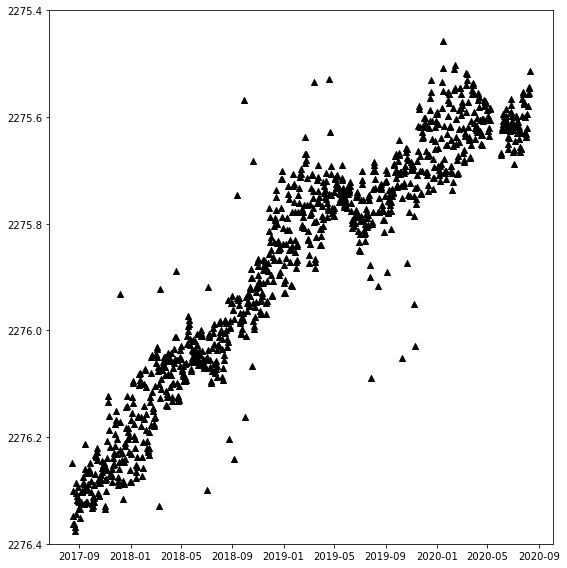

In [60]:
# averaged daily pressure from 15s data
fig, axs = plt.subplots(1, 1, figsize=(8, 8), tight_layout=True)
axs.scatter(ds_days.time, ds_days.bottom_pressure, color='k', marker='^')
axs.set(ylim = (2276.4, 2275.4))

[(2276.4, 2275.4), Text(0, 0.5, 'pressure (dbar)'), Text(0.5, 0, 'date')]

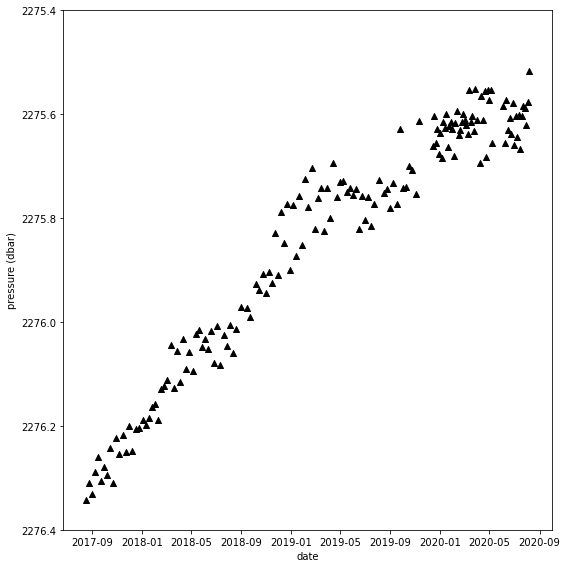

In [61]:
# for comparison: 161 averaged ~weekly time blocks spanning same time interval
pd_dframe = pd.read_csv('pressure_data.csv')
pressure = pd_dframe['pressure'].to_list()
ptimes = [dt64(pd_dframe['datetime'][i]) for i in range(len(pd_dframe.index))]
fig, axs = plt.subplots(1, 1, figsize=(8, 8), tight_layout=True)
axs.scatter(ptimes, pressure, marker='^', color='k')
axs.set(ylim = (2276.4, 2275.4), xlabel='date', ylabel='pressure (dbar)')

# 15 second pressure 301 302 303 averaged to 1 day

In [6]:
# the three source files (301, 302, 303), each spanning 2014 to 2020 at 15s sample interval, required 20 minutes per for resampling
#
# pressurefiles = glob.glob('/data/botpt/pressure/deployment*.nc')
#
# for i in range(1,4):
#     ds         = xr.open_dataset(pressurefiles[i-1]).swap_dims({'obs':'time'})
#     ds_day     = ds.resample(time="1D").mean()
#     outputfile = '/data/botpt/pressure/30' + str(i) + '_pressure_15s_full_record_1day.nc'
#     ds_day.to_netcdf(outputfile)

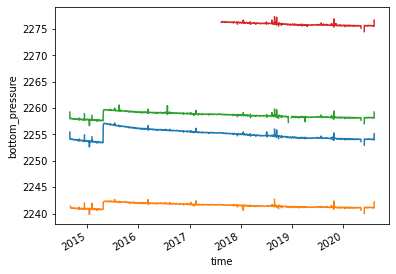

In [70]:
pressurefiles = glob.glob('/data/botpt/pressure/30?_pressure_15s_*.nc')
ds = [xr.open_dataset(pressurefile) for pressurefile in pressurefiles]
ds[0].bottom_pressure.plot()
ds[1].bottom_pressure.plot()
ds[2].bottom_pressure.plot()
ds[3].bottom_pressure.plot()

[(0.0, -5.0), Text(0, 0.5, 'relative pressure (dbar)'), Text(0.5, 0, 'date')]

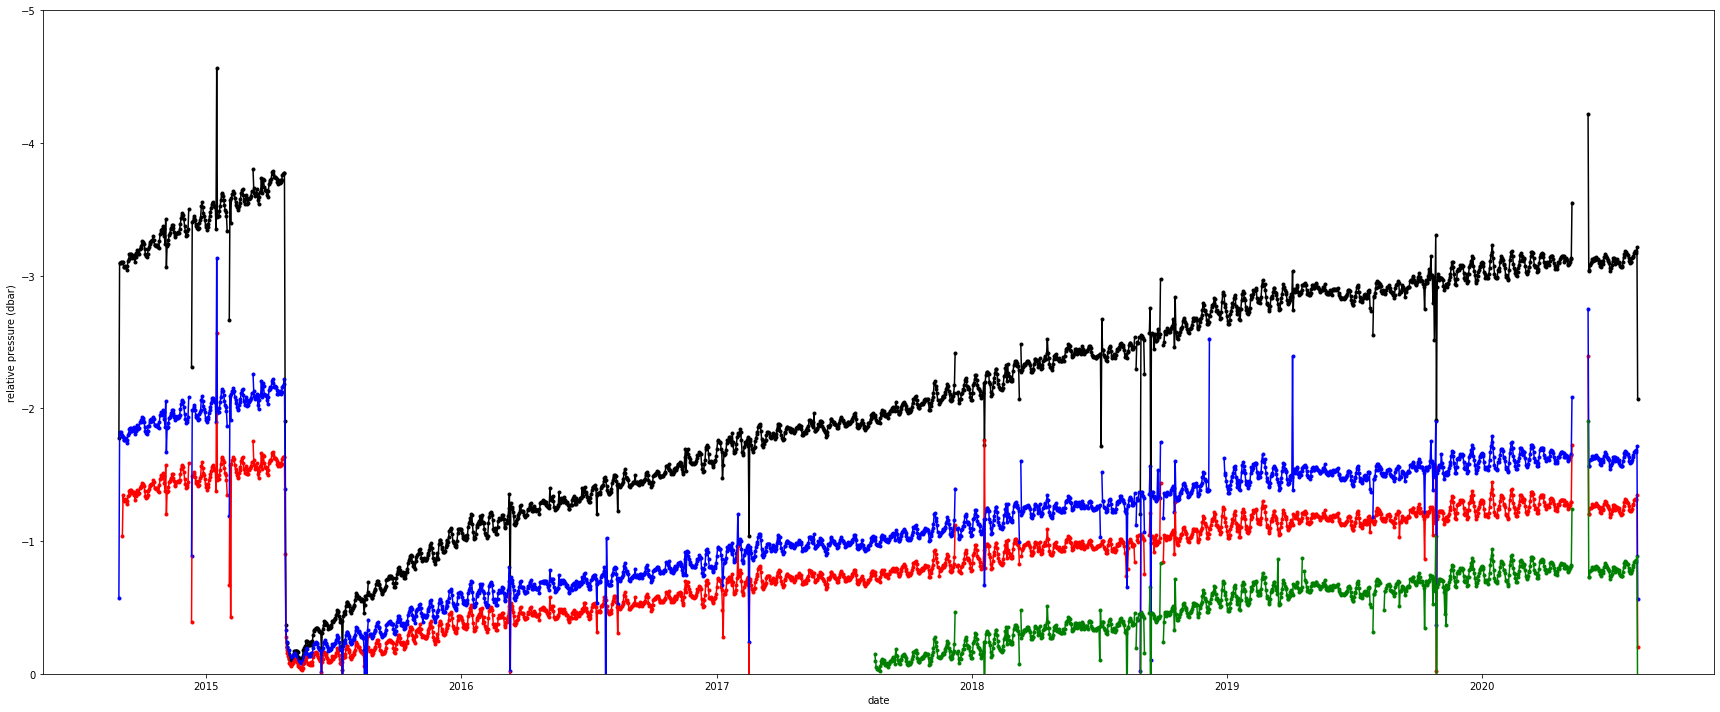

In [69]:
colors = ['k', 'r', 'b', 'g']
nplots = 4     # 301 302 303 304
               # respectively central, ?, intl, ASHES
    
p_bottom, p_top = [2257.2, 2242.4,2259.8, 2276.4], [2253.4,2240.6,2257.6,2275.4]

fig, axs = plt.subplots(1, 1, figsize=(24, 10), tight_layout=True)
for i in range(nplots):
    axs.scatter(ds[i].time, -p_bottom[i] + ds[i].bottom_pressure, color=colors[i], marker='.')
    axs.plot(ds[i].time, -p_bottom[i] + ds[i].bottom_pressure, color=colors[i])

axs.set(ylim = (0., -5.), xlabel='date', ylabel='relative pressure (dbar)')

# fig, axs = plt.subplots(nplots, 1, figsize=(8, 6*nplots), tight_layout=True)
# for i in range(nplots):
#     axs[i].scatter(ds[i].time, -p_bottom[i] + ds[i].bottom_pressure, color=colors[i], marker='^')
#     axs[i].set(ylim = (0., -p_bottom[i] + p_top[i]), xlabel='date', ylabel='pressure (dbar)')